In [860]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast
from sklearn.model_selection import *
from sklearn.metrics import *
import plotly.express as px
from sklearn import metrics

In [861]:
scores =[]
classifier_list = []

In [862]:
df=pd.read_csv('music_genre.csv')

In [863]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [864]:
df.tail()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.0,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.0,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.0,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.0,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop
50004,63470.0,Naughty By Nature,Hip Hop Hooray,67.0,0.10200,0.862,267267.0,0.642,0.0,F#,0.272,-13.652,Minor,0.1010,99.20100000000001,4-Apr,0.765,Hip-Hop


In [865]:
df = df.dropna()

In [866]:
df.isna().sum()

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

<AxesSubplot: xlabel='music_genre', ylabel='popularity'>

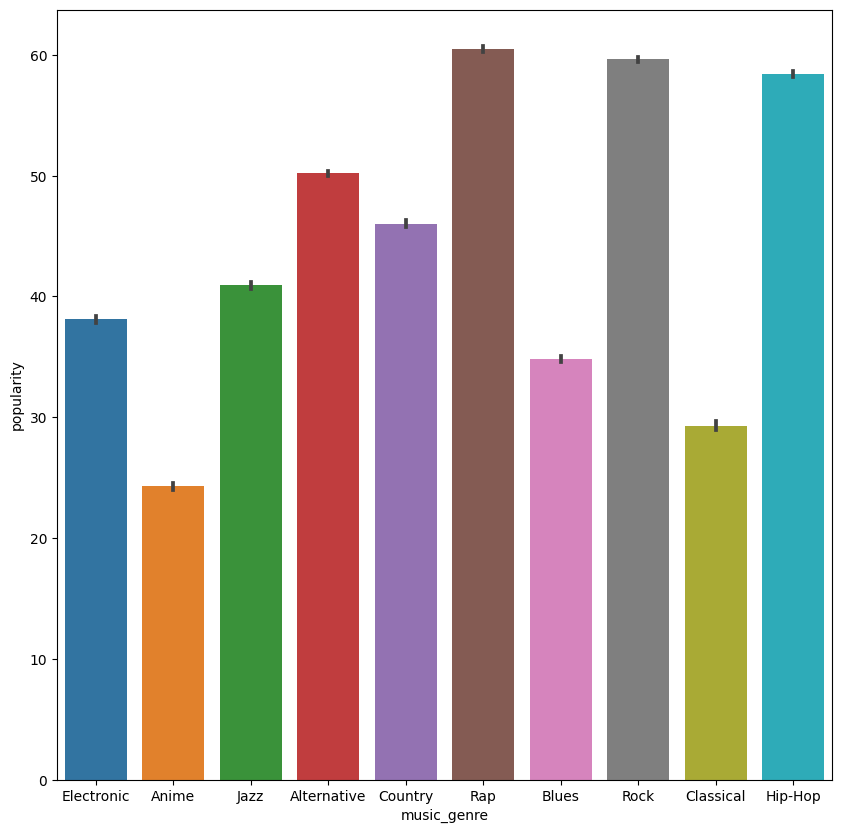

In [867]:
plt.figure(figsize=[10,10])
sns.barplot(x=df.music_genre,y=df.popularity)

In [868]:
dup_df=df

In [869]:
genre_names = [col for col in dup_df['music_genre'].unique() if type(col)!=float]
# genre_names

In [870]:
dup_df['tempo'] = dup_df['tempo'].replace('?',np.nan)
dup_df["tempo"] = dup_df["tempo"].astype("float")
dup_df['tempo'] = dup_df['tempo'].fillna(dup_df['tempo'].mean())
dup_df['duration_ms'] = dup_df['duration_ms'].replace(-1.0,np.nan)
dup_df["duration_ms"] = dup_df["duration_ms"].astype("float")
dup_df['duration_ms'] = dup_df['duration_ms'].fillna(dup_df['duration_ms'].mean())

In [871]:
# dup_df = dup_df.drop(columns = ['instance_id','loudness', 'artist_name', 'track_name', 'obtained_date'])
# dup_df = dup_df.drop(columns = ['instance_id', 'artist_name', 'track_name', 'obtained_date'])
# dup_df = dup_df.drop(columns = ['instance_id','artist_name','track_name','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','obtained_date','valence'])
# dup_df = dup_df.drop(columns = ['instance_id', 'track_name', 'obtained_date'])
dup_df = dup_df.drop(columns = ['instance_id', 'track_name', 'obtained_date'])
# dup_df = dup_df.drop(columns = ['instance_id','artist_name','track_name','duration_ms','energy','key','liveness','loudness','mode','speechiness','tempo','obtained_date'])

In [872]:
# import math
# dup_df
# # res = pd.cut(dup_df['instrumentalness'],bins=[-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
# for i in range(len(dup_df)):
#     dup_df['instrumentalness'] = round(dup_df['instrumentalness'],1)
# dup_df

In [873]:
# dup_df[dup_df["artist_name"] == "empty_field"]

In [874]:
# artists = dup_df["artist_name"].value_counts()[:20].sort_values(ascending = True)
# dup_df.drop("artist_name", axis = 1, inplace = True)
# dup_df

LABEL ENCODING

In [875]:
from sklearn.preprocessing import LabelEncoder
dup_df['music_genre'] = LabelEncoder().fit_transform(dup_df['music_genre'])
dup_df['artist_name'] = LabelEncoder().fit_transform(dup_df['artist_name'])
# dup_df['track_name'] = LabelEncoder().fit_transform(dup_df['track_name'])
dup_df['duration_ms'] = LabelEncoder().fit_transform(dup_df['duration_ms'])
dup_df['tempo'] = LabelEncoder().fit_transform(dup_df['tempo'])
dup_df['key'] = LabelEncoder().fit_transform(dup_df['key'])
dup_df['mode'] = LabelEncoder().fit_transform(dup_df['mode'])

In [876]:
dup_df

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,5029,27.0,0.00468,0.652,14794,0.941,0.79200,1,0.115,-5.201,1,0.0748,9750,0.759,5
1,6117,31.0,0.01270,0.622,11260,0.890,0.95000,5,0.124,-7.043,1,0.0300,13669,0.531,5
2,1591,28.0,0.00306,0.620,10882,0.755,0.01180,11,0.534,-4.617,0,0.0345,17615,0.333,5
3,1707,34.0,0.02540,0.774,4496,0.700,0.00253,4,0.157,-4.498,0,0.2390,17635,0.270,5
4,6519,32.0,0.00465,0.638,11860,0.587,0.90900,9,0.157,-6.266,0,0.0413,22498,0.323,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,492,59.0,0.03340,0.913,14794,0.574,0.00000,4,0.119,-7.022,0,0.2980,8931,0.330,6
50001,4980,72.0,0.15700,0.709,15479,0.362,0.00000,2,0.109,-9.814,0,0.0550,15784,0.113,6
50002,614,51.0,0.00597,0.693,7149,0.763,0.00000,5,0.143,-5.443,0,0.1460,18567,0.395,6
50003,6104,65.0,0.08310,0.782,16667,0.472,0.00000,10,0.106,-5.016,1,0.0441,1819,0.354,6


In [877]:
X = dup_df.drop(['music_genre'], axis=1)
y = dup_df['music_genre']

In [878]:
# dup_df = dup_df.dropna()
# dup_df.isna().sum()

In [879]:
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=614,test_size=0.25)

In [880]:
# dup_df.to_csv('file1.csv')

CORRELATION MATRIX

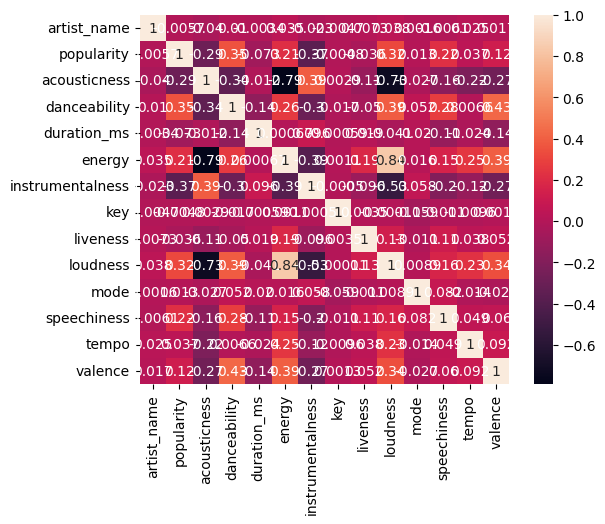

In [881]:
corrmat = X_train.corr()
sns.heatmap(corrmat, annot = True, square = True);

## CLASSIFIERS

KNN

In [882]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)
KNN_pred = KNN_model.predict(X_test)
acc = metrics.accuracy_score(y_test,KNN_pred)
f1_score = metrics.f1_score(y_test,KNN_pred,average='macro')
recall = metrics.recall_score(y_test,KNN_pred,average='macro')
precision = metrics.precision_score(y_test,KNN_pred,average='macro')
print("KNN Accuarcy: ",acc)
print("KNN F1 Score: ",f1_score)
print("KNN Recall: ",recall)
print("KNN Precision : ",precision)
scores.append([acc,f1_score,recall,precision])
classifier_list.append('KNN')
# KNN_model.score(X_test,y_test)

KNN Accuarcy:  0.16368
KNN F1 Score:  0.14834781475573103
KNN Recall:  0.16400584324892656
KNN Precision :  0.15930157727530928


<AxesSubplot: >

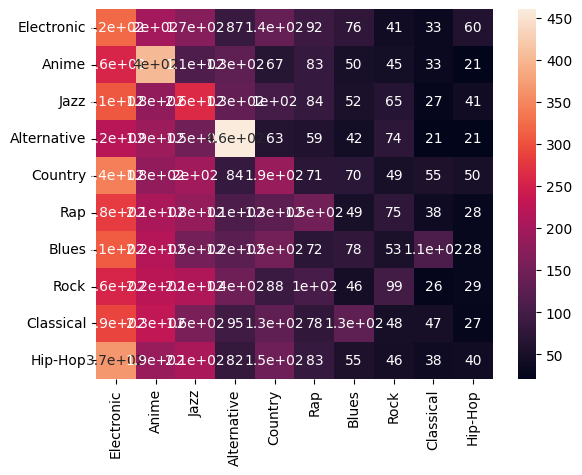

In [883]:
confusion_matrix = metrics.confusion_matrix(y_test, KNN_pred)
sns.heatmap(confusion_matrix,annot = True,xticklabels=genre_names,yticklabels=genre_names)

DECISION TREE CLASSIFIER

In [884]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train,y_train)
DT_pred = DT_model.predict(X_test)
acc = metrics.accuracy_score(y_test,DT_pred)
f1_score = metrics.f1_score(y_test,DT_pred,average='macro')
recall = metrics.recall_score(y_test,DT_pred,average='macro')
precision = metrics.precision_score(y_test,DT_pred,average='macro')
print("Decision Tree Accuarcy: ",acc)
print("Decision Tree F1 Score: ",f1_score)
print("Decision Tree Recall: ",recall)
print("Decision Tree Precision : ",precision)
scores.append([acc,f1_score,recall,precision])
classifier_list.append('Decison Tree')
# DT_model.score(X_test,y_test)

Decision Tree Accuarcy:  0.4408
Decision Tree F1 Score:  0.44079380484921976
Decision Tree Recall:  0.4401757562675289
Decision Tree Precision :  0.44179395841812336


<AxesSubplot: >

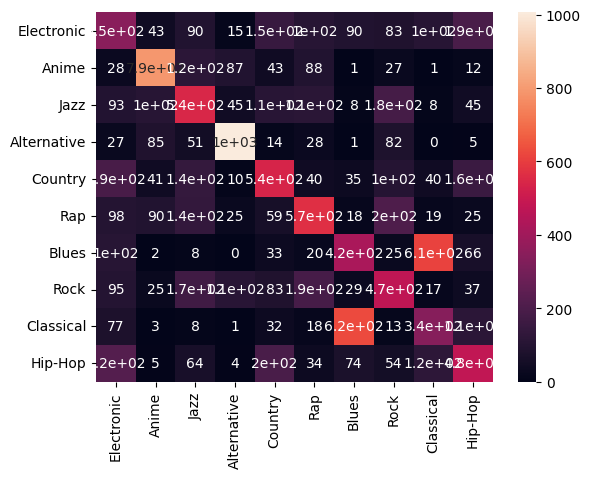

In [885]:
confusion_matrix = metrics.confusion_matrix(y_test, DT_pred)
sns.heatmap(confusion_matrix,annot = True,xticklabels=genre_names,yticklabels=genre_names)

RANDOM FOREST CLASSIFIER

In [886]:
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_leaf=4)
RFC_model.fit(X_train,y_train)
RFC_pred = RFC_model.predict(X_test)
acc = metrics.accuracy_score(y_test,RFC_pred)
f1_score = metrics.f1_score(y_test,RFC_pred,average='macro')
recall = metrics.recall_score(y_test,RFC_pred,average='macro')
precision = metrics.precision_score(y_test,RFC_pred,average='macro')
print("Random Forest Accuarcy: ",acc)
print("Random Forest F1 Score: ",f1_score)
print("Random Forest Recall: ",recall)
print("Random Forest Precision : ",precision)
scores.append([acc,f1_score,recall,precision])
classifier_list.append('Random Forest')
# RFC_model.score(X_test,y_test)

Random Forest Accuarcy:  0.57368
Random Forest F1 Score:  0.5710834467976568
Random Forest Recall:  0.5730538170500352
Random Forest Precision :  0.5766571425511201


<AxesSubplot: >

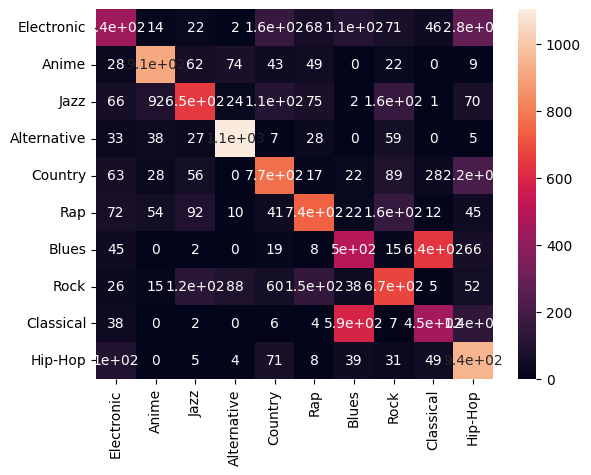

In [887]:
confusion_matrix = metrics.confusion_matrix(y_test, RFC_pred)
sns.heatmap(confusion_matrix,annot = True,xticklabels=genre_names,yticklabels=genre_names)

GAUSSIAN NAIVE BAYES

In [888]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)
NB_pred = NB_model.predict(X_test)
acc = metrics.accuracy_score(y_test,NB_pred)
f1_score = metrics.f1_score(y_test,NB_pred,average='macro')
recall = metrics.recall_score(y_test,NB_pred,average='macro')
precision = metrics.precision_score(y_test,NB_pred,average='macro')
print("Naive Bayes Accuarcy: ",acc)
print("Naive Bayes F1 Score: ",f1_score)
print("Naive Bayes Recall: ",recall)
print("Naive Bayes Precision : ",precision)
scores.append([acc,f1_score,recall,precision])
classifier_list.append('GaussianNB')
# NB_model.score(X_test,y_test)

Naive Bayes Accuarcy:  0.47592
Naive Bayes F1 Score:  0.4714738210337727
Naive Bayes Recall:  0.47384543935052587
Naive Bayes Precision :  0.49631104325213055


<AxesSubplot: >

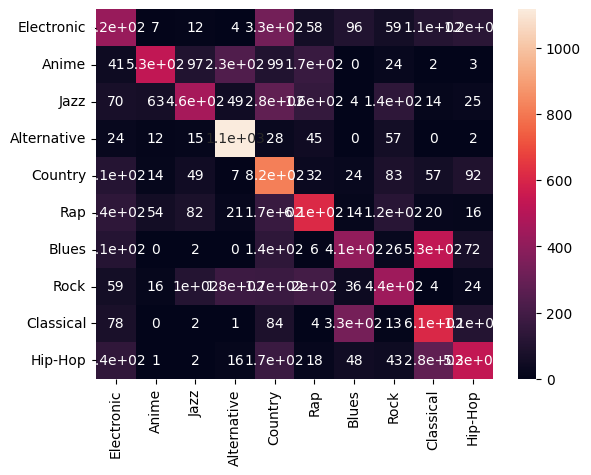

In [889]:
confusion_matrix = metrics.confusion_matrix(y_test, NB_pred)
sns.heatmap(confusion_matrix,annot = True,xticklabels=genre_names,yticklabels=genre_names)

SVM

In [890]:
from sklearn import svm
# svm_model = svm.SVC(kernel='linear',C=1,decision_function_shape='ovo')
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)
svm_model.score(X_test,y_test)

0.19688

In [891]:
acc = metrics.accuracy_score(y_test,svm_pred)
f1_score = metrics.f1_score(y_test,svm_pred,average='macro')
recall = metrics.recall_score(y_test,svm_pred,average='macro')
precision = metrics.precision_score(y_test,svm_pred,average='macro')
print("SVM Accuarcy: ",acc)
print("SVM Score: ",f1_score)
print("SVM Recall: ",recall)
print("SVM Precision : ",precision)

SVM Accuarcy:  0.19688
SVM Score:  0.1644539120536876
SVM Recall:  0.19533187153157308
SVM Precision :  0.1923255197943025


<AxesSubplot: >

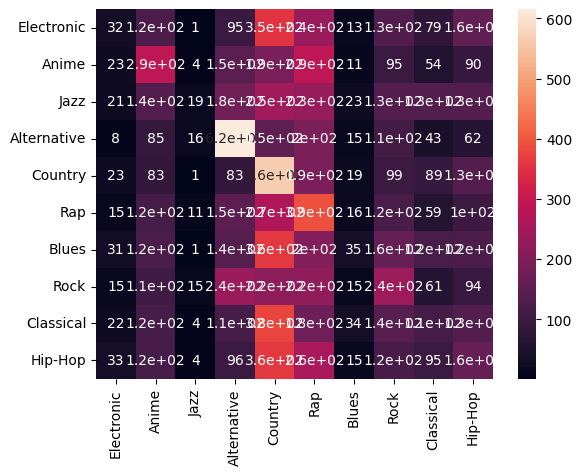

In [892]:
confusion_matrix = metrics.confusion_matrix(y_test, svm_pred)
sns.heatmap(confusion_matrix,annot = True,xticklabels=genre_names,yticklabels=genre_names)

GRADIENT BOOSTING

In [893]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
# clf.score(X_test,y_test)
GBC_pred = GBC_model.predict(X_test)
acc = metrics.accuracy_score(y_test,GBC_pred)
f1_score = metrics.f1_score(y_test,GBC_pred,average='macro')
recall = metrics.recall_score(y_test,GBC_pred,average='macro')
precision = metrics.precision_score(y_test,GBC_pred,average='macro')
print("Gradient Boosting Accuarcy: ",acc)
print("Gradient Boosting F1 Score: ",f1_score)
print("Gradient Boosting Recall: ",recall)
print("Gradient Boosting Precision : ",precision)
scores.append([acc,f1_score,recall,precision])
classifier_list.append('GradientBoosting')

Gradient Boosting Accuarcy:  0.5996
Gradient Boosting F1 Score:  0.5982250326411245
Gradient Boosting Recall:  0.5988651739283769
Gradient Boosting Precision :  0.6007724868527088


<AxesSubplot: >

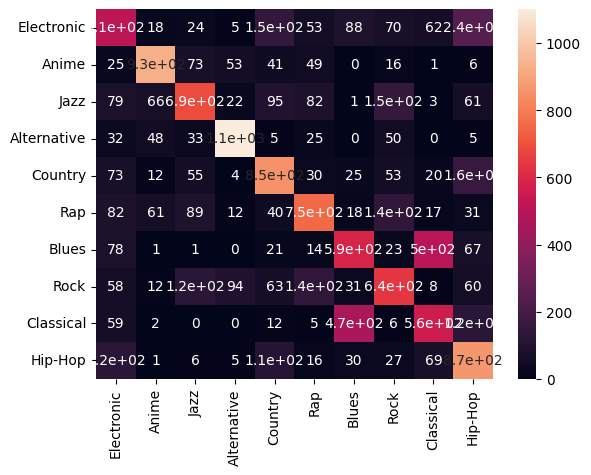

In [894]:
confusion_matrix = metrics.confusion_matrix(y_test, GBC_pred)
sns.heatmap(confusion_matrix,annot = True,xticklabels=genre_names,yticklabels=genre_names)

LOGISTIC REGRESSION

In [895]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
# model.score(X_test,y_test)
LR_pred = LR_model.predict(X_test)
acc = metrics.accuracy_score(y_test,LR_pred)
f1_score = metrics.f1_score(y_test,LR_pred,average='macro')
recall = metrics.recall_score(y_test,LR_pred,average='macro')
precision = metrics.precision_score(y_test,LR_pred,average='macro')
print("LR Accuarcy: ",acc)
print("LR F1 Score: ",f1_score)
print("LR Recall: ",recall)
print("LR Precision : ",precision)
scores.append([acc,f1_score,recall,precision])
classifier_list.append('LogisticRegression')

LR Accuarcy:  0.27224
LR F1 Score:  0.2488484094331603
LR Recall:  0.273558142617894
LR Precision :  0.253801563859367


<AxesSubplot: >

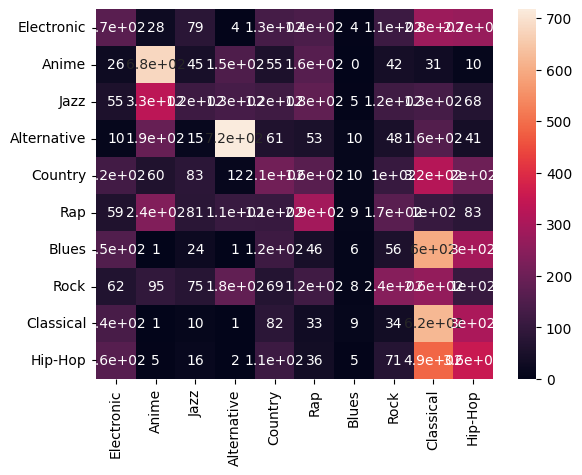

In [896]:
confusion_matrix = metrics.confusion_matrix(y_test, LR_pred)
sns.heatmap(confusion_matrix,annot = True,xticklabels=genre_names,yticklabels=genre_names)

Multilayer Perceptron

In [897]:
from sklearn.neural_network import MLPClassifier
MLP_model = MLPClassifier().fit(X_train, y_train)
# clf.score(X_test,y_test)
MLP_pred = MLP_model.predict(X_test)
acc = metrics.accuracy_score(y_test,MLP_pred)
f1_score = metrics.f1_score(y_test,MLP_pred,average='macro')
recall = metrics.recall_score(y_test,MLP_pred,average='macro')
precision = metrics.precision_score(y_test,MLP_pred,average='macro')
print("MLP Accuarcy: ",acc)
print("MLP F1 Score: ",f1_score)
print("MLP Recall: ",recall)
print("MLP Precision : ",precision)
scores.append([acc,f1_score,recall,precision])
classifier_list.append('MLPClassifier')

MLP Accuarcy:  0.19544
MLP F1 Score:  0.14052688786135822
MLP Recall:  0.19414413378921858
MLP Precision :  0.38176361647632445


<AxesSubplot: >

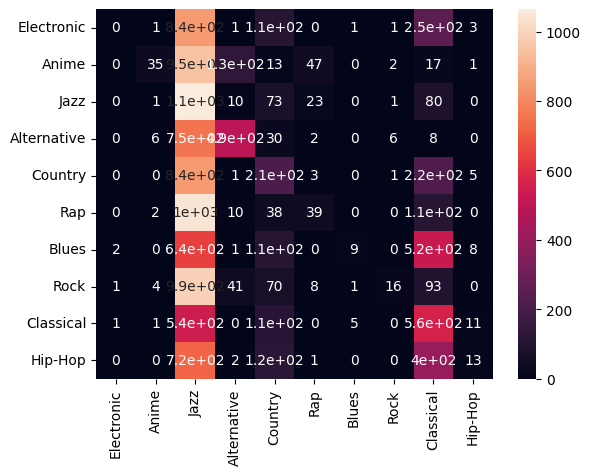

In [898]:
confusion_matrix = metrics.confusion_matrix(y_test, MLP_pred)
sns.heatmap(confusion_matrix,annot = True,xticklabels=genre_names,yticklabels=genre_names)

In [899]:
print("Classifier\tAccuracy\t F1 Score\t Recall \t Precision")
print("---------------------------------------------------------------------------------------------")
for i in range(len(scores)):
    print(classifier_list[i],":",scores[i])

Classifier	Accuracy	 F1 Score	 Recall 	 Precision
---------------------------------------------------------------------------------------------
KNN : [0.16368, 0.14834781475573103, 0.16400584324892656, 0.15930157727530928]
Decison Tree : [0.4408, 0.44079380484921976, 0.4401757562675289, 0.44179395841812336]
Random Forest : [0.57368, 0.5710834467976568, 0.5730538170500352, 0.5766571425511201]
GaussianNB : [0.47592, 0.4714738210337727, 0.47384543935052587, 0.49631104325213055]
GradientBoosting : [0.5996, 0.5982250326411245, 0.5988651739283769, 0.6007724868527088]
LogisticRegression : [0.27224, 0.2488484094331603, 0.273558142617894, 0.253801563859367]
MLPClassifier : [0.19544, 0.14052688786135822, 0.19414413378921858, 0.38176361647632445]


In [900]:
acc = []
precision = []
recall = []
F1score = []

In [901]:
for i in range(len(scores)):
    acc.append(scores[i][0])
    F1score.append(scores[i][1])
    recall.append(scores[i][2])
    precision.append(scores[i][3])


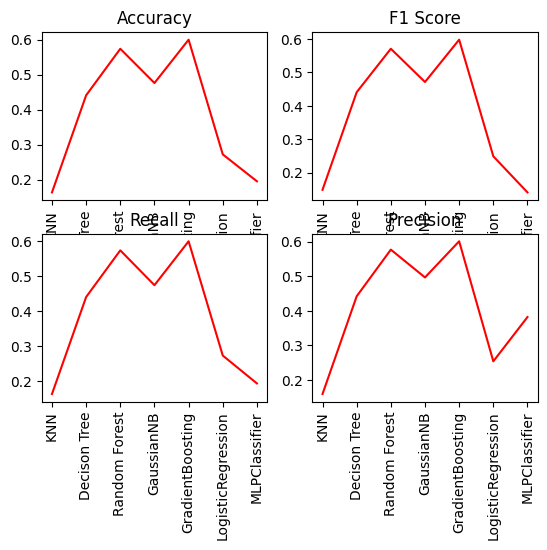

In [902]:
parameters=[acc,F1score,recall,precision]
titles=["Accuracy","F1 Score","Recall","Precision"]
for i in range(len(parameters)):
    plt.subplot(2,2,i+1)
    plt.plot(classifier_list,parameters[i],color="red")
    plt.xticks(classifier_list,rotation="vertical")
    plt.title(titles[i])

## SEQUENTIAL FEATURE SELECTION

In [903]:
from mlxtend.feature_selection import SequentialFeatureSelector
# sfs = SequentialFeatureSelector(DT_model,n_features_to_select=5,forward=True,cv=5,floating=False,scoring='accuracy',n_jobs=-1)   
sfs = SequentialFeatureSelector(NB_model,k_features='best',forward=True,scoring='accuracy')   
sfs.fit(X_train,y_train)
res = sfs.get_metric_dict()

In [904]:
for i in range(1,len(res)+1):
    print(res[i].get('avg_score'))
res

0.28808
0.37048
0.42464
0.44231999999999994
0.45469333333333334
0.4640533333333334
0.47506666666666664
0.47607999999999995
0.4754933333333334
0.4726666666666667
0.46712
0.46141333333333334
0.46842666666666666
0.4668


{1: {'feature_idx': (1,),
  'cv_scores': array([0.28453333, 0.28266667, 0.2852    , 0.29293333, 0.29506667]),
  'avg_score': 0.28808,
  'feature_names': ('popularity',),
  'ci_bound': 0.00636305406019651,
  'std_dev': 0.004950672232692788,
  'std_err': 0.002475336116346394},
 2: {'feature_idx': (1, 3),
  'cv_scores': array([0.3748    , 0.3716    , 0.36413333, 0.3716    , 0.37026667]),
  'avg_score': 0.37048,
  'feature_names': ('popularity', 'danceability'),
  'ci_bound': 0.004507575497476857,
  'std_dev': 0.003507046874191713,
  'std_err': 0.0017535234370958564},
 3: {'feature_idx': (1, 3, 9),
  'cv_scores': array([0.42906667, 0.42306667, 0.4212    , 0.42533333, 0.42453333]),
  'avg_score': 0.42464,
  'feature_names': ('popularity', 'danceability', 'loudness'),
  'ci_bound': 0.003371112241864359,
  'std_dev': 0.0026228398519331777,
  'std_err': 0.0013114199259665886},
 4: {'feature_idx': (1, 3, 9, 11),
  'cv_scores': array([0.4432    , 0.432     , 0.44626667, 0.44293333, 0.4472    ]),

In [905]:
from mrmr import mrmr_classif
X = pd.DataFrame(X_train)
y = pd.DataFrame(y_train)
selected_features = mrmr_classif(X,y,K=10)
selected_features

100%|██████████| 10/10 [00:00<00:00, 11.89it/s]


['popularity',
 'mode',
 'loudness',
 'speechiness',
 'danceability',
 'acousticness',
 'instrumentalness',
 'energy',
 'valence',
 'artist_name']